# Задание 1

GC - состав ридов и его распределение

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from Bio import SeqIO
from Bio.SeqUtils import GC

Попробуем прочитать данные:

In [2]:
#for record in SeqIO.parse("test.fastq", "fastq"):
    #print('%s %s' % (record.id, record.seq))

Я использую KDE (Kernel Density Estimation), чтобы предсказать функцию распределения GC-повторов

## Для R1:

In [86]:
x1 = []
for record in SeqIO.parse('frag.R1.fastq', "fastq"):
    rseq = record.seq
    rseq = rseq.replace('N', '')
    x1.append(GC(rseq))

<Figure size 432x288 with 0 Axes>

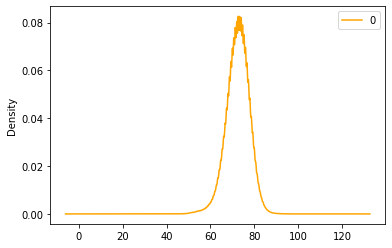

In [78]:
plt.tight_layout()
x1 = pd.DataFrame(x1)
b = x1.plot.kde(color = 'orange')

Среднее число GC-повторов в ридах:

In [79]:
print(np.mean(x1))

0    72.440006
dtype: float64


## Для R2:

0    72.440006
dtype: float64


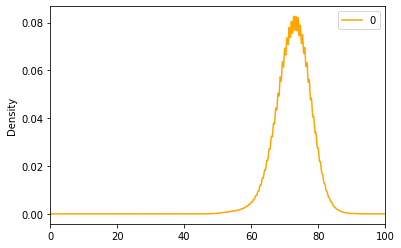

In [68]:
x2 = []
for record in SeqIO.parse('frag.R2.fastq', "fastq"):
    rseq = record.seq
    rseq = rseq.replace('N', '')
    x2.append(GC(rseq))
    
plt.tight_layout()
plt.close()
x2 = pd.DataFrame(x1)
b = x2.plot.kde(color = 'orange')
plt.xlim(0,100)

print(np.mean(x2))

В среднем 72.44% GC-повторов в ридах данного организма (число совпадает для обоих ридов из пары: R1 и R2)

# Задание 2

Распределение вероятности ошибки

In [81]:
for record in SeqIO.parse('frag.R1.fastq','fastq'):
    print(len(record.seq))
    break

150


длина рида 150

Рассчитаем число ридов:

In [84]:
k = 0

for record in SeqIO.parse('frag.R1.fastq','fastq'):
    k += 1
    
print(k)

1716182


## Для R1:

Для данных R1 расчитаем вероятность

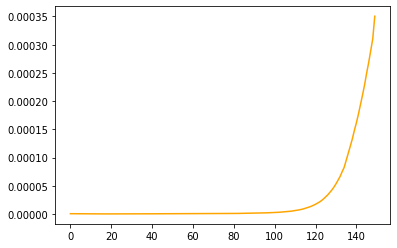

In [99]:
x3 = [0]*150
p1 = [0]*150
plt.close()

for record in SeqIO.parse('frag.R1.fastq','fastq'):
    for i in range(150):
        x3[i] += record.letter_annotations["phred_quality"][i]
        
for i in range(len(x3)):
    
    x3[i] = x3[i]/k #я делю на число ридов, дабы получить среднее качество для каждой позиции

    #затем я выразила вероятность через качество (p через q) и получила следующую формулу:
    p1[i] = (10**(-x3[i]/10))/(1+10**(-x3[i]/10))

p1 = pd.DataFrame(p1)

plt.plot(p1, color='orange')

## Для  R2

Для данных R2 было расчитано качество, чтобы сравнить его с результатом работы FASTQC

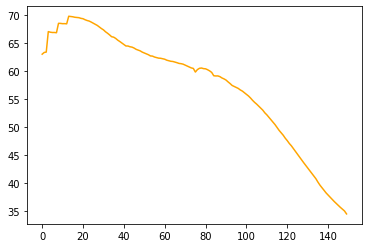

In [100]:
x4 = [0]*150
plt.close()

for record in SeqIO.parse('frag.R1.fastq','fastq'):
    for i in range(150):
        x4[i] += record.letter_annotations["phred_quality"][i]
        
x4 = pd.DataFrame(x4)
x4 = x4/k #я делю на число ридов, дабы получить среднее качество для каждой позиции

#тут я также выразила p через q

plt.plot(x4, color = 'orange')

# Задание 3

## R1

![alt text](R11.png "Title")

![alt text](R12.png "Title")

## R2

![alt text](R22.png "Title")

![alt text](R21.png "Title")

Видно, что предсказанные в языке python и полученные в результате действия FASTQC графические предсатвления похожи. 

Среднее количество GC-повторов также схоже 72% (FASTQC)

При построении графика распределения вероятности график не сходен с представленным обеспечением FASTQC, однако видно, что вероятность ошибки стремительно растет, что соответствует действительности (illumina начинает допускать больше ошибок в течение секвенирования)
